# Python code for data cleaning, EDA, and feature selection model

## Ingrid Wijaya, YueLong Zhang, Arman Bazak, DongHyun Chun

In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import random

In [39]:
df = pd.read_csv("datafest2018-Updated-April12.csv")

## Explatory data analysis before data cleaning

* There are 14586035 records and 23 variables in the dataset


In [40]:
numerical_cols = ["avgOverallRating", "numReviews", "descriptionCharacterLength", "descriptionWordCount", "estimatedSalary", "supervisingJob", 
                 "licenseRequiredJob", "jobAgeDays", "clicks", "localClicks", "experienceRequired"]

In [41]:
def generate_stats():
    df1 = pd.DataFrame(df.apply(lambda x: x.nunique(), axis = 0), columns = ["number_of_unique_values"]) # the number of unique values
    df4 = pd.DataFrame(df.apply(pd.unique, axis = 0), columns = ["unique values"]) # the unique values
    def convert_object_to_str(x):
        if x == "object":
            return "string"
        else:
            return x
    df2 = pd.DataFrame((df.dtypes).apply(convert_object_to_str) , columns = ["data type"])
    #mode
    df3 = df.mode()
    def merge_result(row_series):
        if row_series.isna()[1]:
            return [row_series[0]]
        else:
            return [row_series[0], row_series[1]]
    df3 = pd.DataFrame(df3.T.apply(merge_result, axis = 1), columns = ["mode"])
    df_missing = pd.DataFrame(df.isna().mean() * 100, columns = ["percentage_missing"])
    df_var = pd.DataFrame(df[numerical_cols].var(), columns = ["variance"])
    #mean
    df_mean= pd.DataFrame(df[numerical_cols].mean(), columns = ["mean"])
    #median
    df_median= pd.DataFrame(df[numerical_cols].median(), columns = ["median"])
    return pd.concat([df1, df4, df2, df3, df_missing, df_var, df_mean, df_median], axis = 1)

In [42]:
original_df = generate_stats()
original_df

,number_of_unique_values,unique values,data type,mode,percentage_missing,variance,mean,median
date,395,"[2016-11-01, 2016-11-02, 2016-11-03, 2016-11-0...",string,[2017-08-24],0.000000,NaN,NaN,NaN
companyId,150993,"[company00000, company00002, company00003, com...",string,[company02436],0.000000,NaN,NaN,NaN
jobId,520434,"[job0000000, job0000002, job0000003, job000000...",string,"[job0210510, job0246932]",0.000000,NaN,NaN,NaN
country,3,"[CA, US, DE]",string,[US],0.000000,NaN,NaN,NaN
stateProvince,87,"[ON, AZ, GA, AR, BC, BY, BW, CO, TX, PA, FL, N...",string,[CA],0.000000,NaN,NaN,NaN
city,17747,"[Cambridge, Peoria, Cartersville, Malvern, Aug...",string,[New York],2.318512,NaN,NaN,NaN
avgOverallRating,42,"[0.0, 3.7, 5.0, 4.0, 3.5, 3.6, 2.7, 3.4, 4.1, ...",float64,[0.0],0.000000,3.545542e+00,1.714418,0.0
numReviews,630,"[nan, 71.0, 46.0, 120.0, 50.0, 16.0, 49.0, 135...",float64,[53.0],56.547828,6.358664e+05,187.283428,69.0
industry,186,"[nan, CONSTRUCTION, REAL_ESTATE, BANKS_AND_FIN...",string,[HEALTH_CARE],89.427031,NaN,NaN,NaN
normTitle,6391,"[driver, customer service representative, host...",string,[retail sales associate],8.930083,NaN,NaN,NaN


In [43]:
print(original_df.loc[:, original_df.columns != 'unique values'].to_latex(index_names = True, float_format = "{:0.2f}".format))

\begin{tabular}{lrllrrrr}
\toprule
{} &  number\_of\_unique\_values & data type &                      mode &  percentage\_missing &     variance &     mean &   median \\
\midrule
date                       &                      395 &    string &              [2017-08-24] &                0.00 &          NaN &      NaN &      NaN \\
companyId                  &                   150993 &    string &            [company02436] &                0.00 &          NaN &      NaN &      NaN \\
jobId                      &                   520434 &    string &  [job0210510, job0246932] &                0.00 &          NaN &      NaN &      NaN \\
country                    &                        3 &    string &                      [US] &                0.00 &          NaN &      NaN &      NaN \\
stateProvince              &                       87 &    string &                      [CA] &                0.00 &          NaN &      NaN &      NaN \\
city                       &            

In [47]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,avgOverallRating,numReviews,descriptionCharacterLength,descriptionWordCount,experienceRequired,estimatedSalary,supervisingJob,licenseRequiredJob,jobAgeDays,clicks,localClicks
avgOverallRating,1.000000,-0.019174,0.115466,0.115163,-0.019311,0.056288,0.024494,0.016688,0.023956,0.004403,0.006796
numReviews,-0.019174,1.000000,-0.004179,-0.011801,-0.007770,-0.060020,0.054568,-0.021617,0.027155,-0.016250,-0.013932
descriptionCharacterLength,0.115466,-0.004179,1.000000,0.988589,0.142108,0.193925,0.296379,0.079984,0.021817,0.025167,0.009665
descriptionWordCount,0.115163,-0.011801,0.988589,1.000000,0.130964,0.174988,0.275544,0.080978,0.021792,0.023707,0.010122
experienceRequired,-0.019311,-0.007770,0.142108,0.130964,1.000000,0.395059,0.157816,-0.106772,0.031814,-0.016426,-0.033571
estimatedSalary,0.056288,-0.060020,0.193925,0.174988,0.395059,1.000000,0.199761,-0.000202,0.014558,-0.024369,-0.049391
supervisingJob,0.024494,0.054568,0.296379,0.275544,0.157816,0.199761,1.000000,-0.078801,0.017653,-0.013536,-0.022412
licenseRequiredJob,0.016688,-0.021617,0.079984,0.080978,-0.106772,-0.000202,-0.078801,1.000000,0.011243,-0.011288,-0.019994
jobAgeDays,0.023956,0.027155,0.021817,0.021792,0.031814,0.014558,0.017653,0.011243,1.000000,-0.168212,-0.131032
clicks,0.004403,-0.016250,0.025167,0.023707,-0.016426,-0.024369,-0.013536,-0.011288,-0.168212,1.000000,0.632995


In [48]:
def generate_random_color():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    return color

In [49]:
plt.rcParams["figure.figsize"] = (20,20)

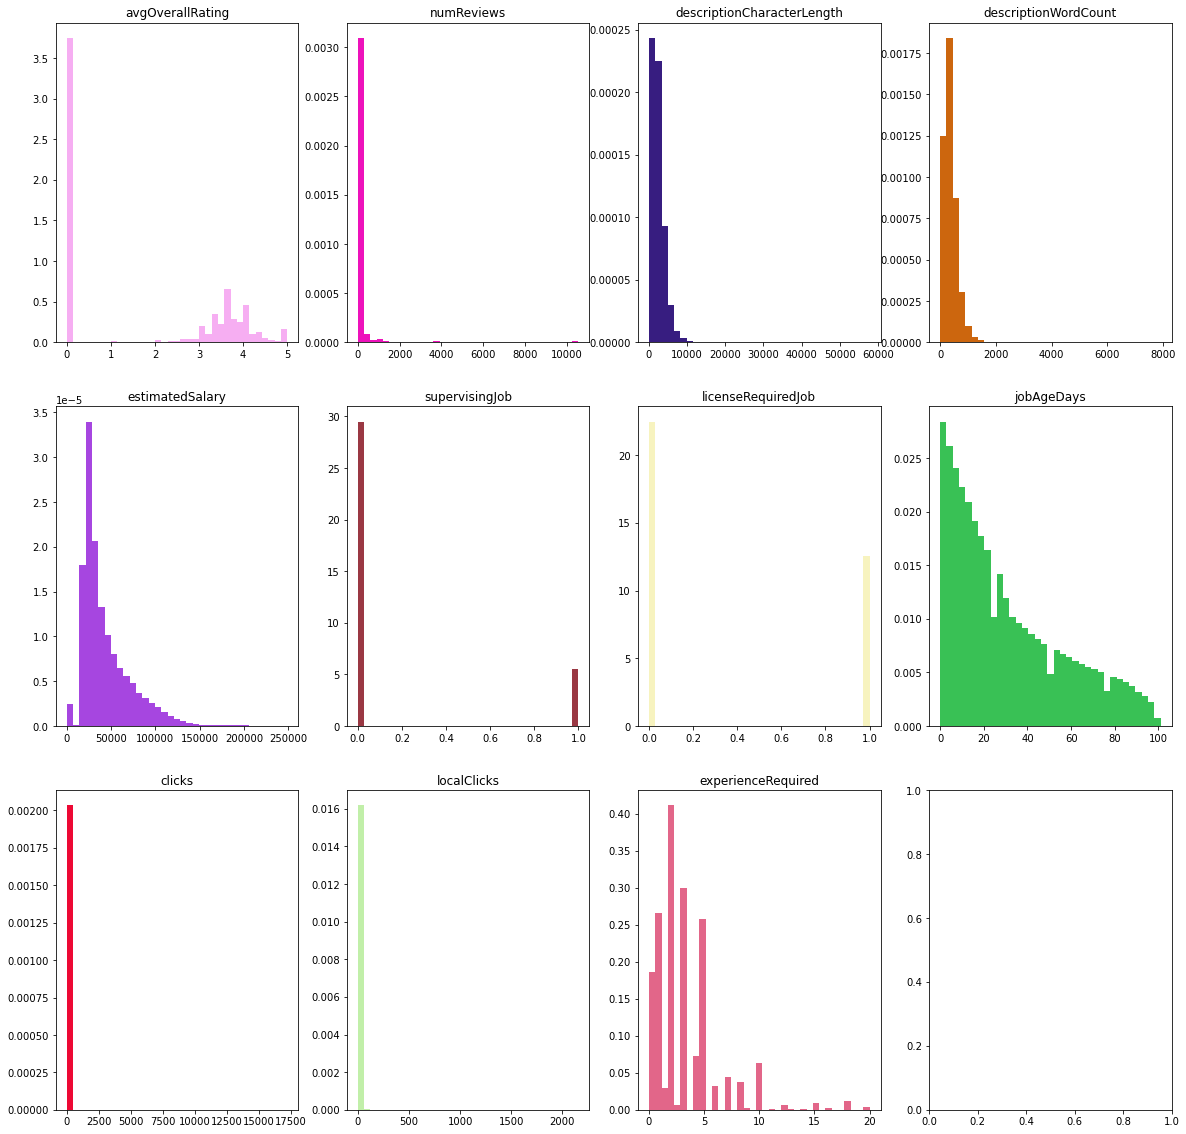

In [50]:
n_row = 3
n_col = 4
fig, axes = plt.subplots(n_row, n_col)
idx = 0
for i in range(n_row):
    for j in range(n_col):

        if idx < len(numerical_cols):

            label = numerical_cols[idx]
            axes[i, j].hist(df[[label]], color = [generate_random_color()], bins = 35, density = True)
            axes[i, j].set_title(label)
            idx += 1

## Data mining

In [51]:
us_idx = (df["country"] == "US")
us_idx.sum()

11547904

In [52]:
df = df.loc[us_idx, :]
df.shape

(11547904, 23)

In [53]:
# convert the date in X to datetime 
df["date"] = pd.to_datetime(df["date"])
# add year and month columns to the dataframe
year_col = df["date"].dt.year
month_col = df["date"].dt.month

In [54]:
# change the X dataframe
df = df.assign(year = year_col,
            month = month_col)
del df["date"]
df.columns

Index(['companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'jobAgeDays', 'clicks', 'localClicks', 'year',
       'month'],
      dtype='object')

### Handle na data

In [55]:
# fill na values with mode for cate and with median for numerical values

In [56]:
df_na_columns = df.columns[df.isna().any()]
df_na_columns

Index(['city', 'numReviews', 'industry', 'normTitle', 'normTitleCategory',
       'experienceRequired', 'salaryCurrency', 'supervisingJob',
       'licenseRequiredJob', 'educationRequirements'],
      dtype='object')

In [57]:
for na_col in df_na_columns:
   
    if df[na_col].dtype == "object":
        df[na_col] = (df[na_col].fillna(df[na_col].mode()[0]))
    else:
        df[na_col] = (df[na_col].fillna(df[na_col].median()))

In [58]:
df.isna().any().all()

False

In [59]:
cleaned_df = generate_stats()
cleaned_df

,number_of_unique_values,unique values,data type,mode,percentage_missing,variance,mean,median
companyId,109002,"[company00002, company00003, company00005, com...",string,[company02436],0.0,NaN,NaN,NaN
jobId,413028,"[job0000002, job0000003, job0000005, job000000...",string,"[job0210510, job0246932]",0.0,NaN,NaN,NaN
country,1,[US],string,[US],0.0,NaN,NaN,NaN
stateProvince,58,"[AZ, GA, AR, CO, TX, PA, FL, SC, NJ, NC, CA, I...",string,[CA],0.0,NaN,NaN,NaN
city,11687,"[Peoria, Cartersville, Malvern, Augusta, McDon...",string,[New York],0.0,NaN,NaN,NaN
avgOverallRating,41,"[0.0, 3.7, 5.0, 3.5, 2.7, 4.0, 3.6, 3.4, 4.1, ...",float64,[0.0],0.0,3.547200e+00,1.910763,2.7
numReviews,626,"[70.0, 71.0, 46.0, 50.0, 49.0, 135.0, 21.0, 43...",float64,[70.0],0.0,3.516752e+05,134.155333,70.0
industry,175,"[HEALTH_CARE, CONSTRUCTION, REAL_ESTATE, BANKS...",string,[HEALTH_CARE],0.0,NaN,NaN,NaN
normTitle,5099,"[customer service representative, host/hostess...",string,[retail sales associate],0.0,NaN,NaN,NaN
normTitleCategory,57,"[customer, food, admin, mednurse, construction...",string,[management],0.0,NaN,NaN,NaN


In [60]:
cleaned_df = cleaned_df.loc[:, cleaned_df.columns != 'unique values']
cleaned_df.index
print(cleaned_df.loc[:, cleaned_df.columns != 'unique values'].to_latex(index_names = True, float_format = "{:0.2f}".format))

\begin{tabular}{lrllrrrr}
\toprule
{} &  number\_of\_unique\_values & data type &                      mode &  percentage\_missing &     variance &     mean &   median \\
\midrule
companyId                  &                   109002 &    string &            [company02436] &                0.00 &          NaN &      NaN &      NaN \\
jobId                      &                   413028 &    string &  [job0210510, job0246932] &                0.00 &          NaN &      NaN &      NaN \\
country                    &                        1 &    string &                      [US] &                0.00 &          NaN &      NaN &      NaN \\
stateProvince              &                       58 &    string &                      [CA] &                0.00 &          NaN &      NaN &      NaN \\
city                       &                    11687 &    string &                [New York] &                0.00 &          NaN &      NaN &      NaN \\
avgOverallRating           &            

## Explatory data analysis after data cleaning

In [75]:
corr_df = df.loc[:, df.columns != 'year']
corr_df = corr_df.loc[:, corr_df.columns != 'month']
corr = corr_df.corr()

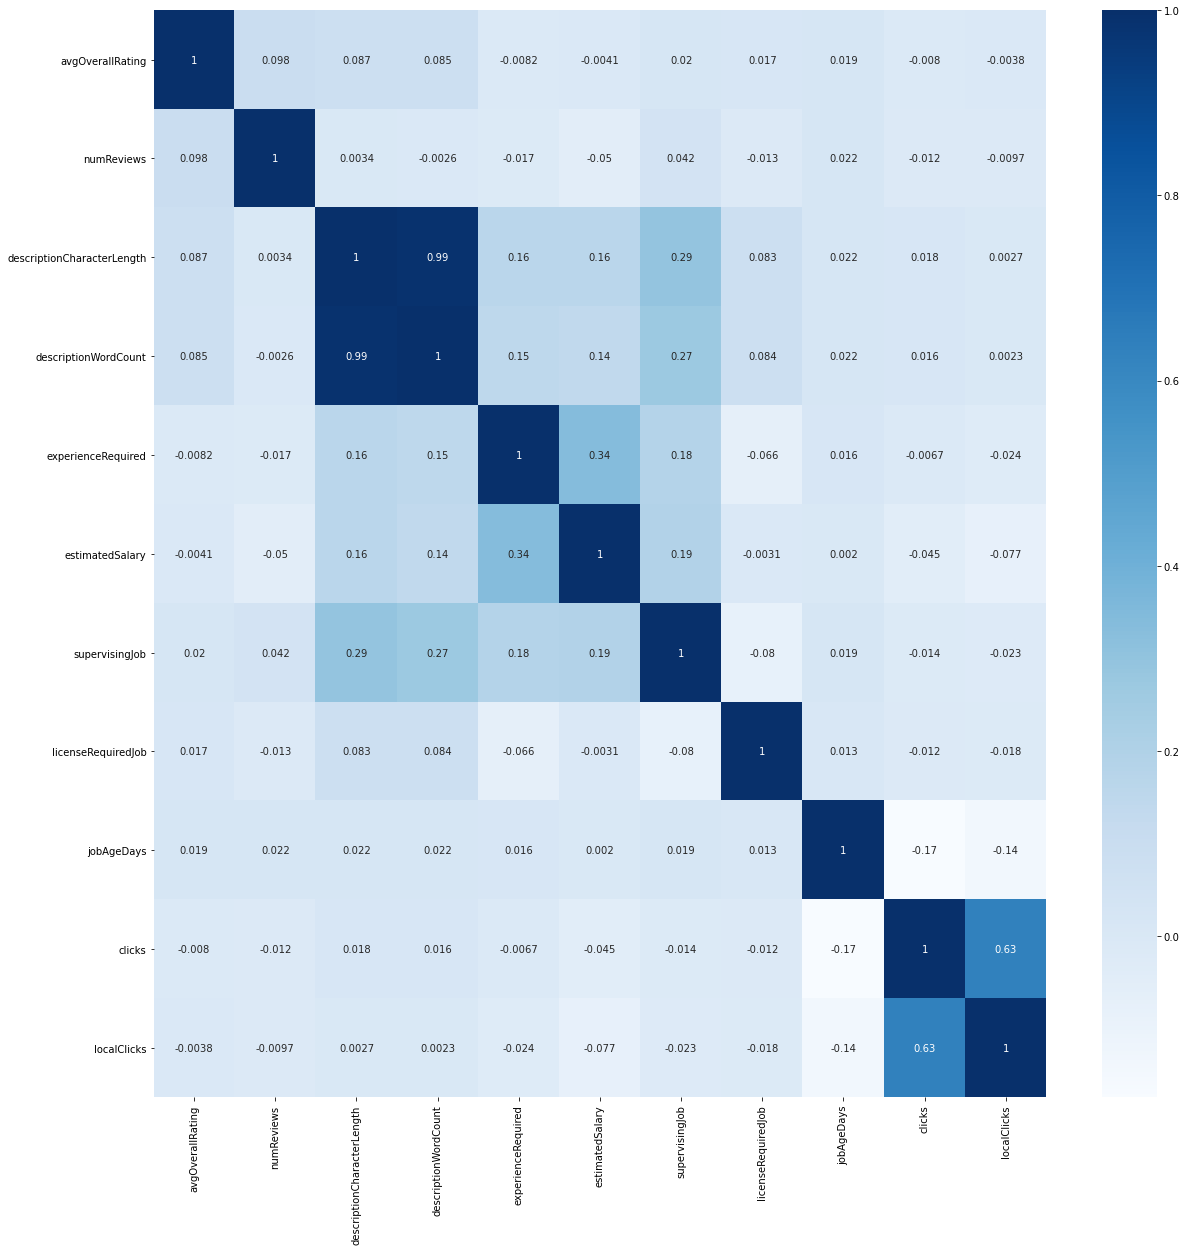

In [76]:
corr_plot = sns.heatmap(corr, cmap="Blues", annot=True)
figure = corr_plot.get_figure()   
figure.savefig('correlation_matrix.png', dpi=400)

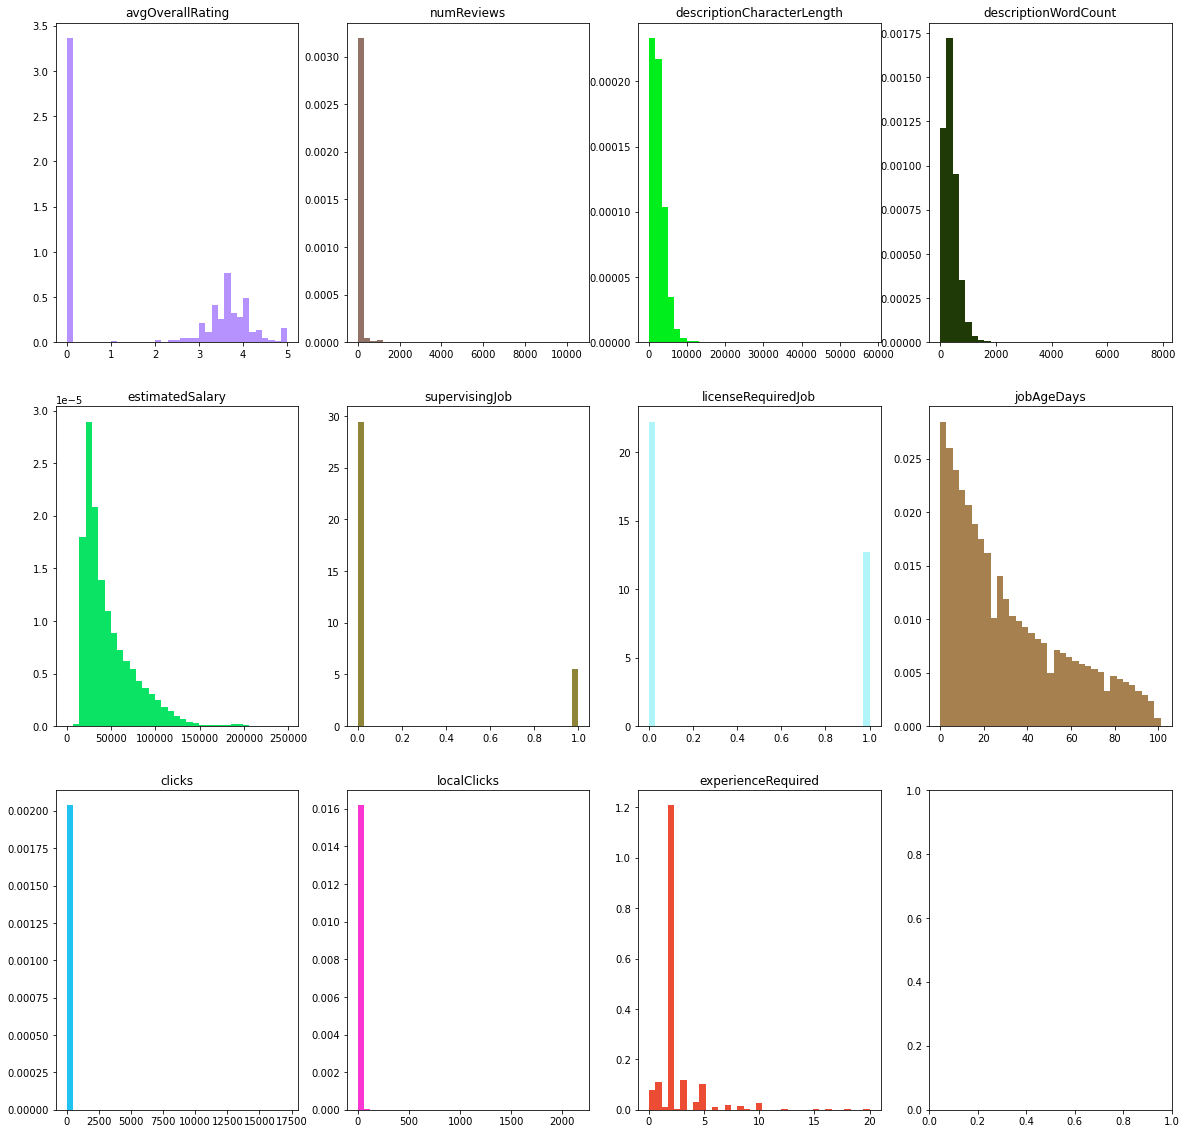

In [77]:
n_row = 3
n_col = 4
fig, axes = plt.subplots(n_row, n_col)
idx = 0
for i in range(n_row):
    for j in range(n_col):

        if idx < len(numerical_cols):

            label = numerical_cols[idx]
            axes[i, j].hist(df[[label]], color = [generate_random_color()], bins = 35, density = True)
            axes[i, j].set_title(label)
            idx += 1

In [79]:
df.columns

Index(['companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'jobAgeDays', 'clicks', 'localClicks', 'year',
       'month'],
      dtype='object')

## Get X and y

In [102]:
X = df.drop("estimatedSalary", axis = 1)
y = df["estimatedSalary"]

In [103]:
display(X.columns)


Index(['companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'salaryCurrency',
       'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'jobAgeDays', 'clicks', 'localClicks', 'year',
       'month'],
      dtype='object')

In [104]:
# drop the currency
X = X.drop("salaryCurrency", axis = 1)

## Feature engineering

### Convert the categorical variable
cate_variable = []

In [105]:
cate_variable = ["country", "stateProvince", "city", 
                "industry", "normTitle", "normTitleCategory", 
                "jobLanguage", "educationRequirements", 
                "year", "month", "companyId","jobId"]

In [106]:
def convert_cate(X, col_name):
    from sklearn.preprocessing import OrdinalEncoder
    oh = OrdinalEncoder().fit(X[[col_name]])
    X[col_name] = oh.transform(X[[col_name]])
     
    return X

In [107]:
for col in cate_variable:
    X = convert_cate(X, col)

In [108]:
X.columns

Index(['companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'jobLanguage',
       'supervisingJob', 'licenseRequiredJob', 'educationRequirements',
       'jobAgeDays', 'clicks', 'localClicks', 'year', 'month'],
      dtype='object')

In [109]:
X.head()

,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,normTitleCategory,...,experienceRequired,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks,year,month
1,1.0,0.0,0.0,4.0,7961.0,0.0,70.0,114.0,953.0,9.0,...,2.0,1.0,0.0,0.0,0.0,99,12,2,0.0,10.0
2,2.0,1.0,0.0,11.0,1528.0,3.7,71.0,114.0,1809.0,18.0,...,2.0,1.0,0.0,0.0,2.0,99,15,3,0.0,10.0
3,4.0,2.0,0.0,2.0,6029.0,5.0,46.0,114.0,977.0,1.0,...,2.0,1.0,0.0,0.0,0.0,99,25,8,0.0,10.0
4,4.0,3.0,0.0,2.0,419.0,5.0,46.0,114.0,977.0,1.0,...,2.0,1.0,0.0,0.0,0.0,99,33,1,0.0,10.0
6,6.0,4.0,0.0,11.0,6314.0,0.0,70.0,114.0,2669.0,32.0,...,2.0,1.0,0.0,1.0,2.0,99,78,7,0.0,10.0


## Reduce the feature

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)

In [111]:
rf.fit(X, y)

RandomForestRegressor(n_jobs=-1)

In [112]:
rf.score(X, y)

0.9995977333076165

In [113]:
from sklearn.metrics import r2_score

r2_score(y, rf.predict(X))

0.9995977333076165

In [114]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [115]:
importance_features = feat_importances.sort_values(ascending = False)

In [55]:
importance_features

normTitleCategory             0.280916
experienceRequired            0.192849
educationRequirements         0.133817
normTitle                     0.107118
companyId                     0.054085
descriptionCharacterLength    0.041682
jobId                         0.035498
city                          0.031976
descriptionWordCount          0.029943
stateProvince                 0.023717
numReviews                    0.021778
avgOverallRating              0.015516
supervisingJob                0.010932
licenseRequiredJob            0.006833
month                         0.006127
industry                      0.003705
jobAgeDays                    0.002004
clicks                        0.000592
localClicks                   0.000472
year                          0.000323
jobLanguage                   0.000116
country                       0.000000
dtype: float64

In [117]:
# generate plots
plt.rcParams["figure.figsize"] = (50,20)

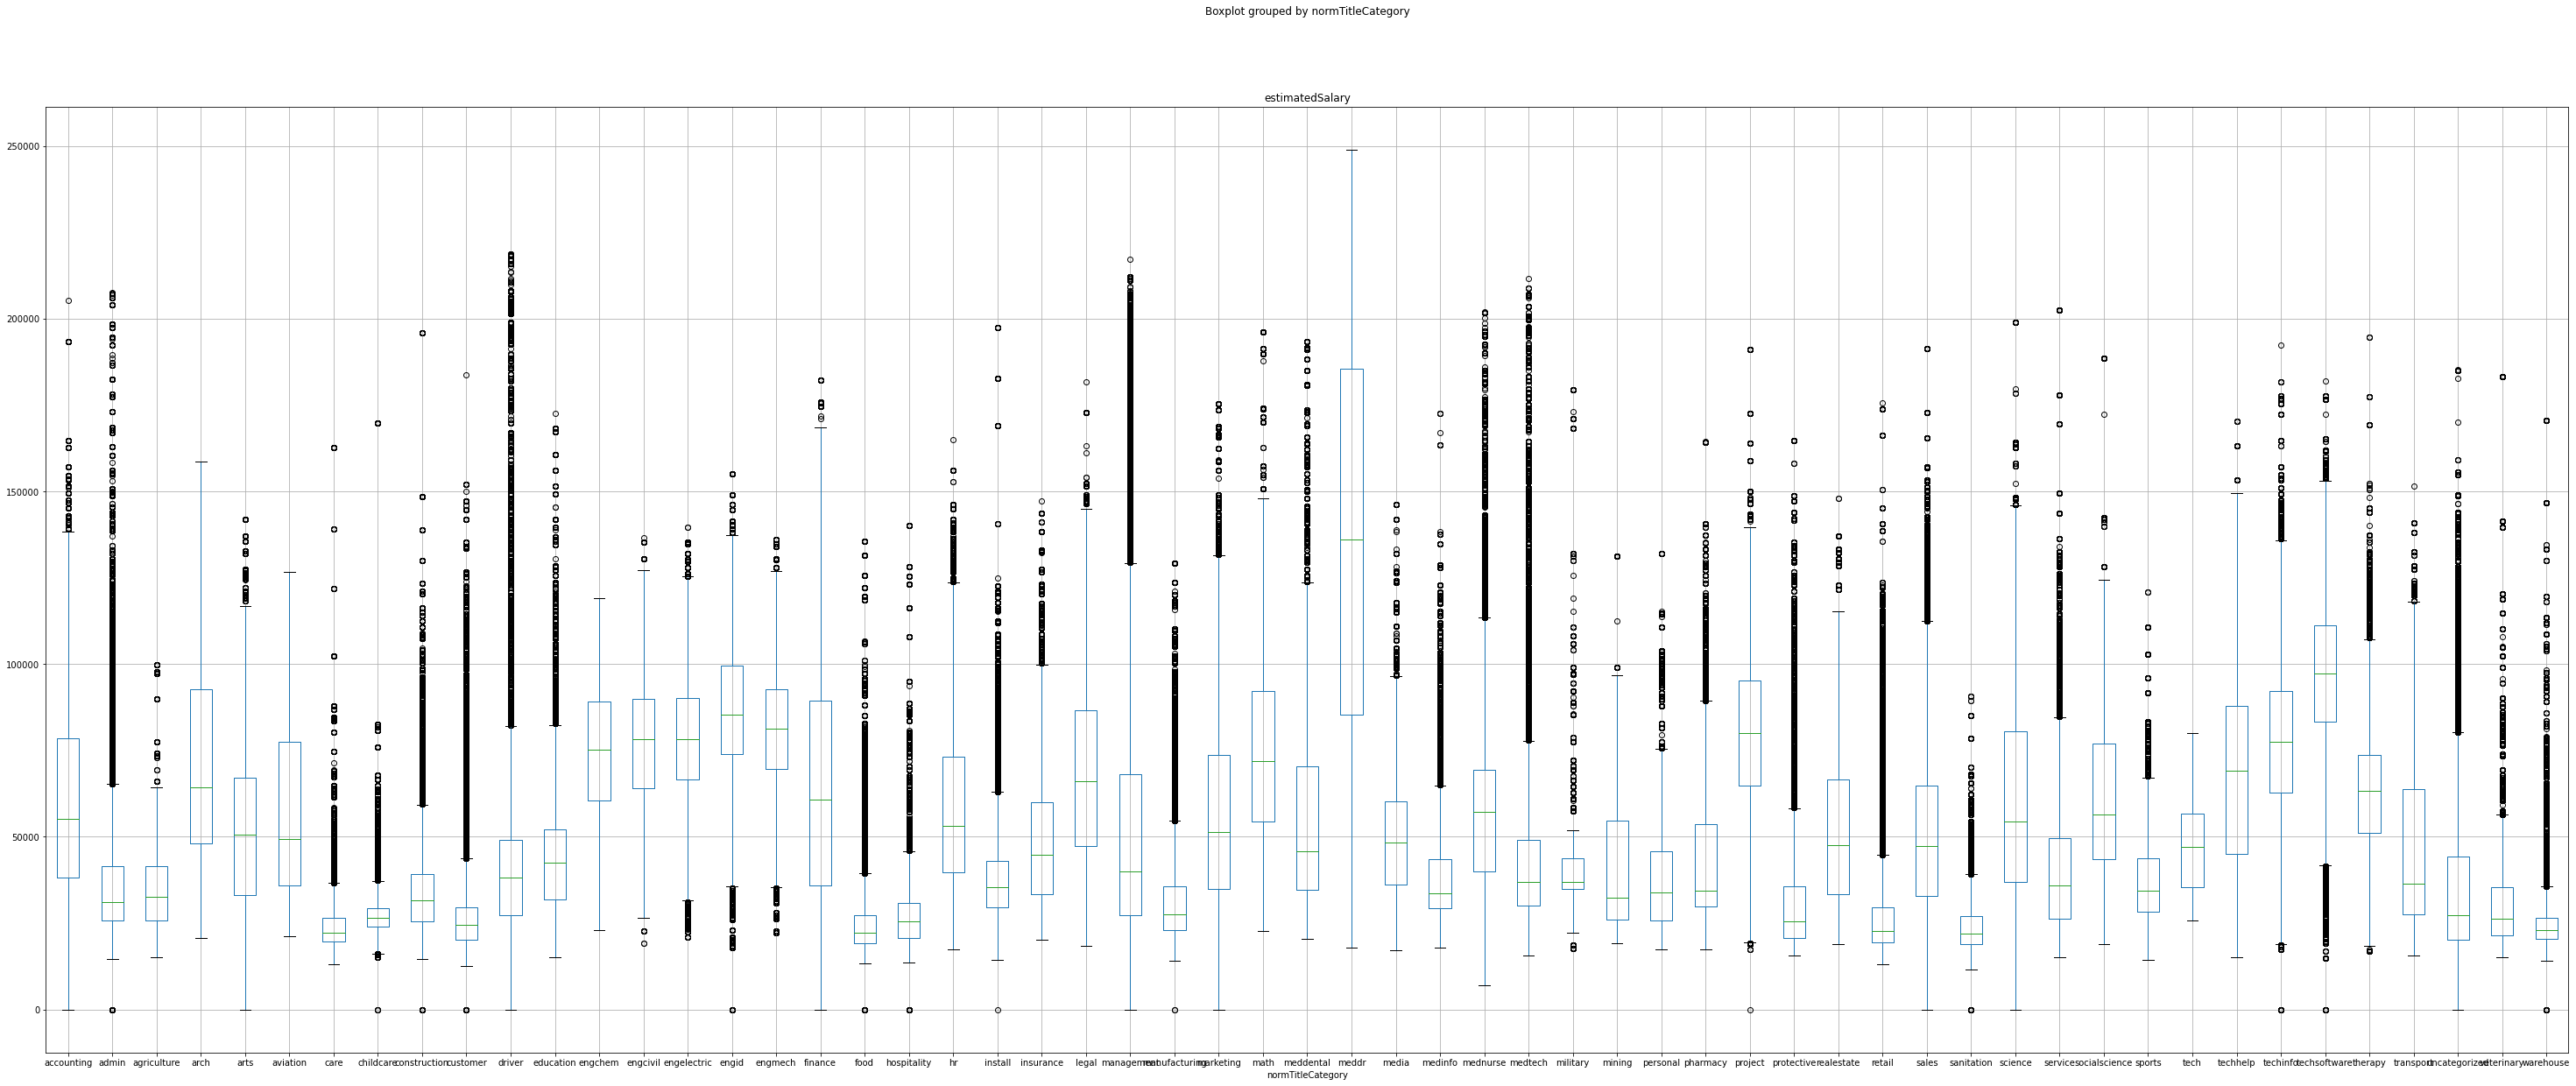

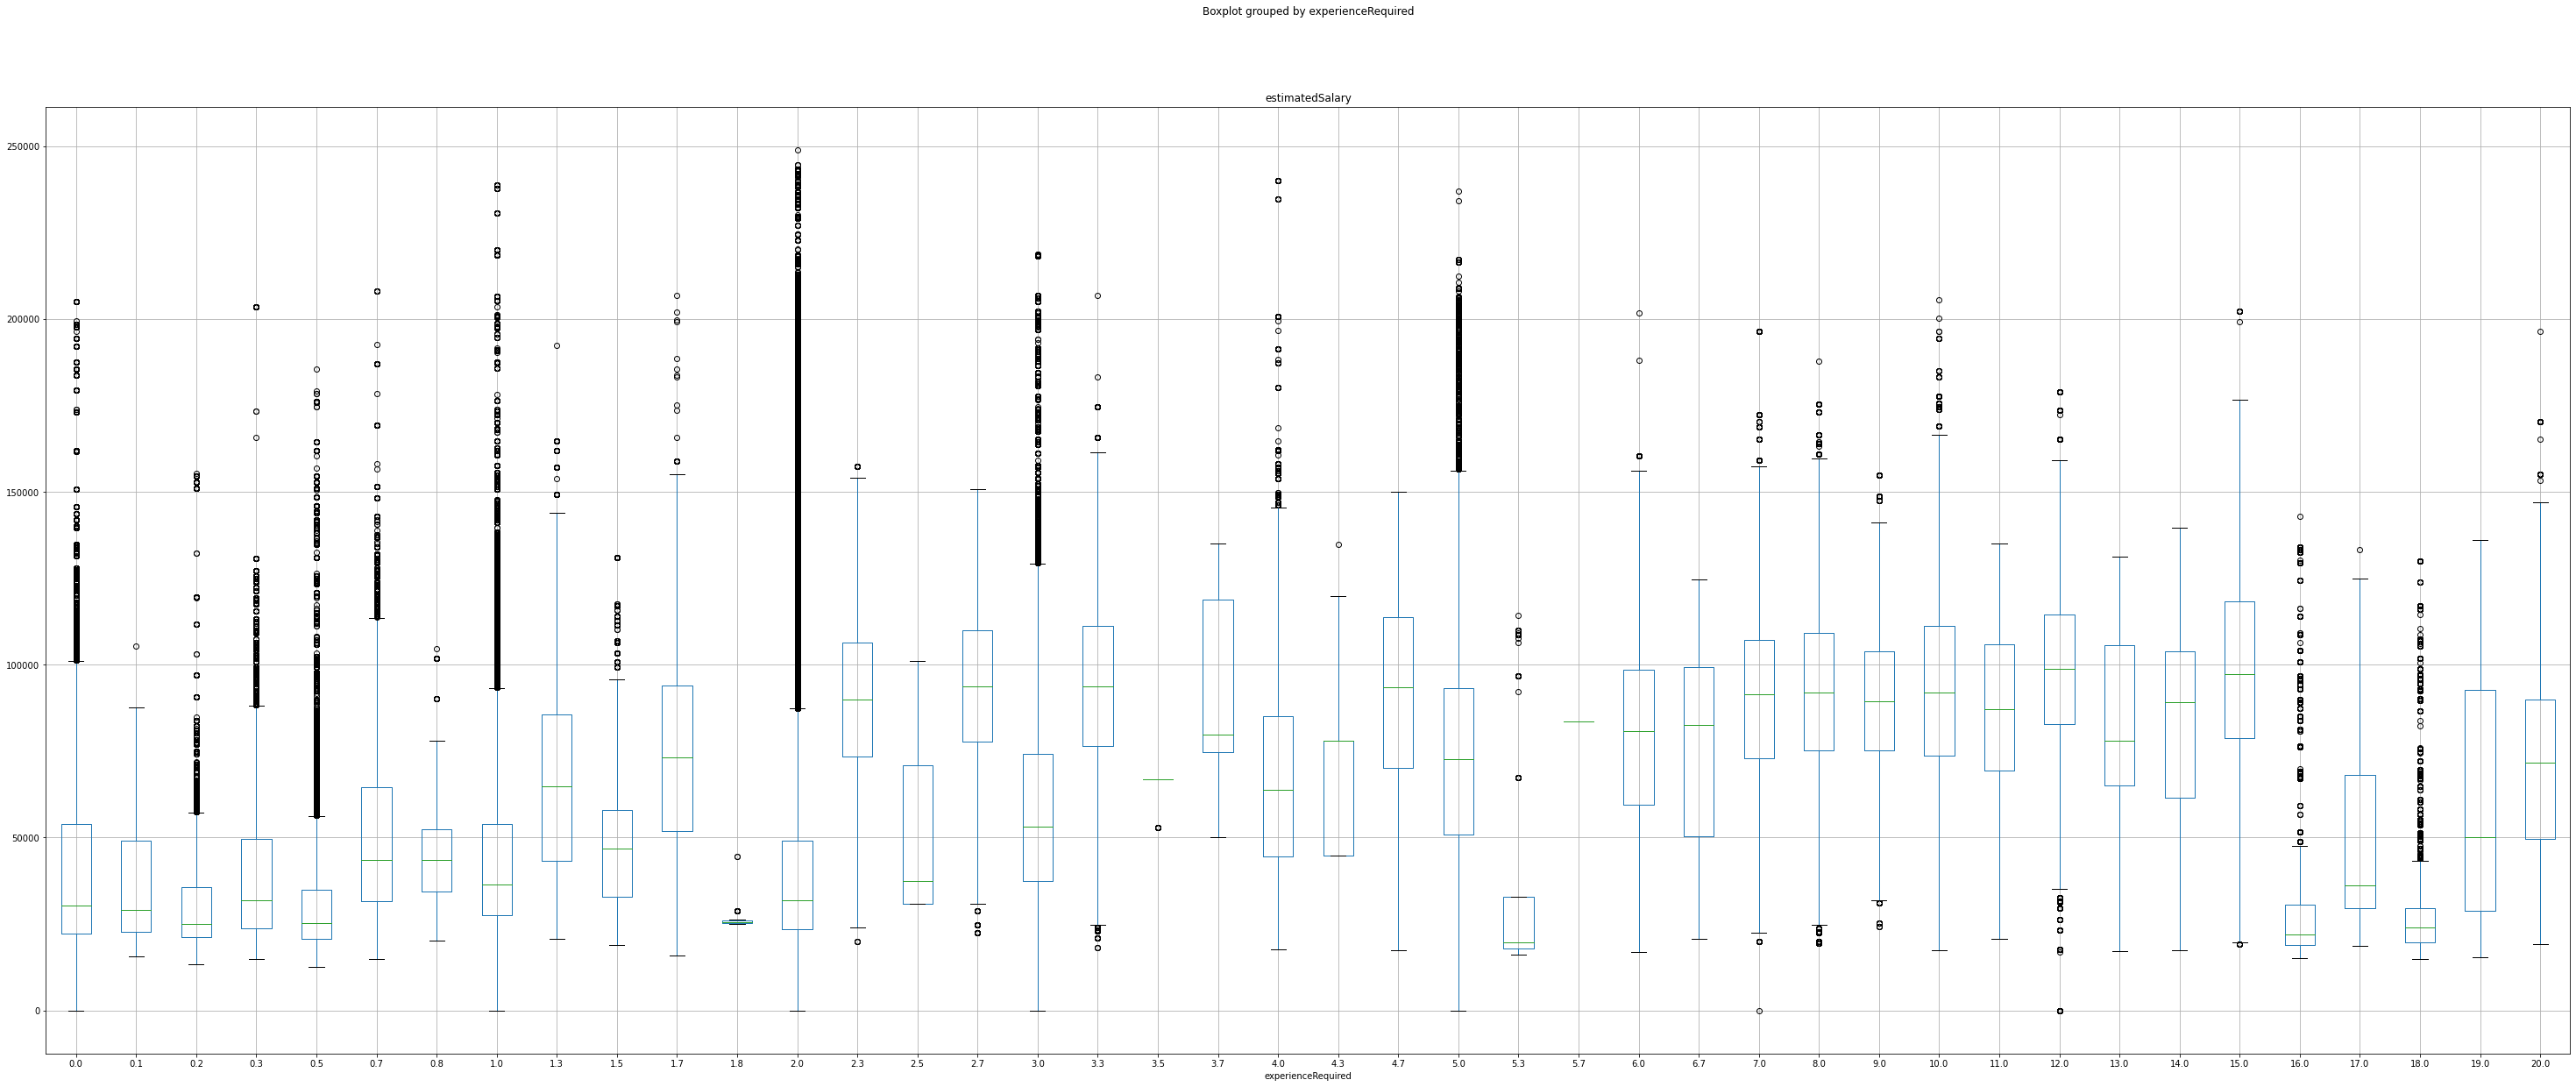

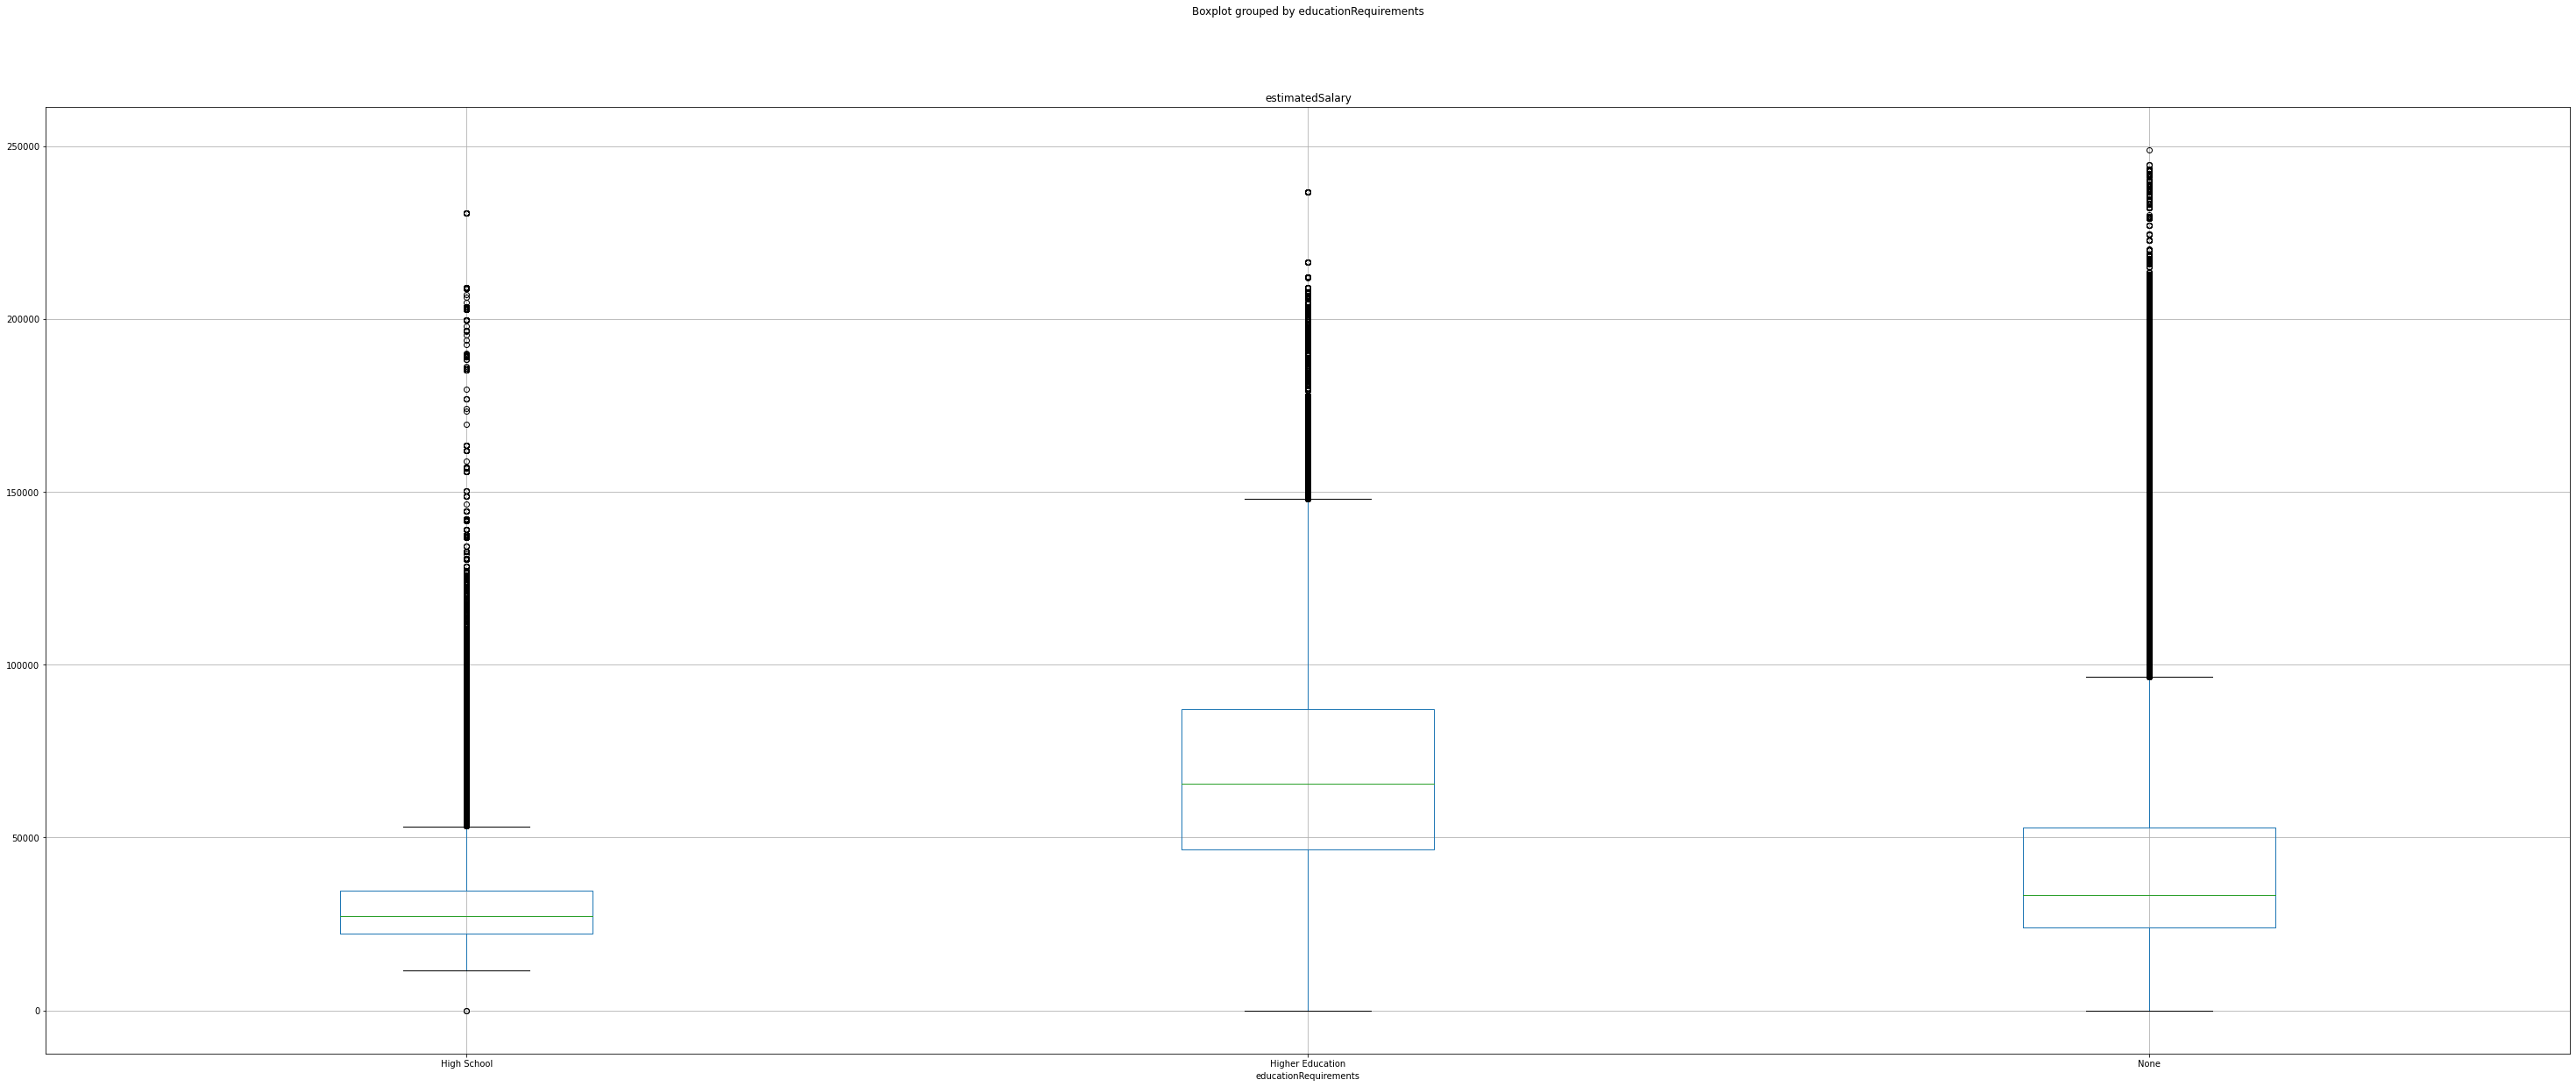

In [118]:
for feature in importance_features.index[0:3]:
    df.boxplot("estimatedSalary", by = feature).figure #.savefig(feature + ".jpg", dpi = 200)

In [36]:
df.groupby("companyId")["estimatedSalary"].mean()

companyId
company00001    24874.630178
company00002    22800.000000
company00003    26521.063574
company00004    56063.043478
company00005    26150.000000
                    ...     
company99993    33300.000000
company99994    25600.000000
company99997    32400.000000
company99998    30300.000000
company99999    56300.000000
Name: estimatedSalary, Length: 109002, dtype: float64